In [ ]:
import matplotlib.pyplot as plt
import torch

from importlib import import_module
from skp.toolbox.classes import Ensemble
from skp.toolbox.functions import draw_bounding_boxes, load_kfold_ensemble_as_list

In [2]:
cfg_name = "boneage.cfg_crop_simple_resize"
cfg = import_module(f"skp.configs.{cfg_name}").cfg
weights_paths = [cfg.save_dir + cfg_name + f"/8b59fed7/fold{fold}/checkpoints/last.ckpt" for fold in [0, 1]]
model = load_kfold_ensemble_as_list(cfg, weights_paths=weights_paths)
model = Ensemble(model)
model = model.eval().cuda()
dataset = import_module(f"skp.datasets.{cfg.dataset}").Dataset(cfg, mode="inference")

/home/ian/miniconda3/envs/skp/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for idx, batch in enumerate(dataset):
    orig_img = dataset.load_image(dataset.inputs[idx])
    x = batch["x"].cuda().unsqueeze(0)
    with torch.inference_mode():
        out = model(x)
    if idx == 5:
        break

In [9]:
x = batch["x"].numpy()[0].astype("uint8")
y = out.cpu().numpy()[0]
y[[0, 2]] = y[[0, 2]] * batch["orig_w"].item()
y[[1, 3]] = y[[1, 3]] * batch["orig_h"].item()
img = draw_bounding_boxes(orig_img, [y.astype("int")], mode="xywh")

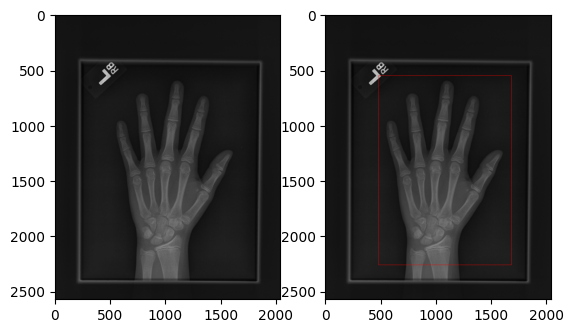

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(orig_img, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")